Sandra Rojas Zegarrundo    GU3030768

Atividade - Regressão Linear


    Objetivo:
        Utilizar a base de dados new-cars.csv e a biblioteca scikit-learn para realizar uma regressão linear.

    Variáveis:
        Variável Dependente (Alvo): mpg (milhas por galão).
        Variáveis Independentes: Todas as outras variáveis do conjunto de dados.

    Tarefas:
        Realizar a regressão linear.
        Calcular e apresentar os seguintes parâmetros para medir o desempenho da regressão:
            Erro Médio Quadrático (MSE)
            Raiz do Erro Médio Quadrático (RMSE)
            Coeficiente de Determinação (R²)

    Aprimoramento:
        Realizar novamente a regressão, desta vez selecionando os melhores parâmetros para as variáveis independentes.

Enviar o arquivo em extensão ipynb e html ou pdf. Outras extensão de arquivo não serão aceitas.

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv('new_cars.csv')

In [131]:
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europa
0,0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,4,17.0,8,302.0,140.0,3449,10.5,70,0,0


In [132]:
df.tail()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europa
393,393,27.0,4,140.0,86.0,2790,15.6,82,0,0
394,394,44.0,4,97.0,52.0,2130,24.6,82,0,1
395,395,32.0,4,135.0,84.0,2295,11.6,82,0,0
396,396,28.0,4,120.0,79.0,2625,18.6,82,0,0
397,397,31.0,4,119.0,82.0,2720,19.4,82,0,0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     398 non-null    int64  
 1   mpg            398 non-null    float64
 2   cylinders      398 non-null    int64  
 3   displacement   398 non-null    float64
 4   horsepower     398 non-null    float64
 5   weight         398 non-null    int64  
 6   acceleration   398 non-null    float64
 7   model year     398 non-null    int64  
 8   origin_asia    398 non-null    int64  
 9   origin_europa  398 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 31.2 KB


In [134]:
df.dtypes

Unnamed: 0         int64
mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin_asia        int64
origin_europa      int64
dtype: object

In [135]:
df.isnull().sum()

Unnamed: 0       0
mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
model year       0
origin_asia      0
origin_europa    0
dtype: int64

<Axes: >

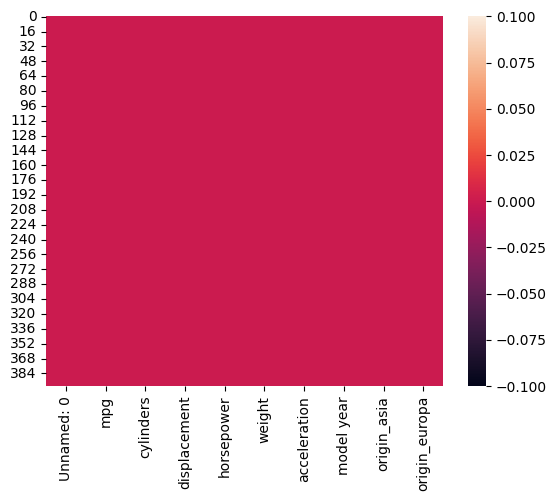

In [136]:
sns.heatmap(df.isnull())

In [137]:
df.nunique()

Unnamed: 0       398
mpg              129
cylinders          5
displacement      82
horsepower        94
weight           351
acceleration      95
model year        13
origin_asia        2
origin_europa      2
dtype: int64

Deletando a primeira coluna por se tratar de índice

In [138]:
df.drop(df.columns[0], axis=1, inplace=True)

In [139]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0


In [140]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europa
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000


<Axes: >

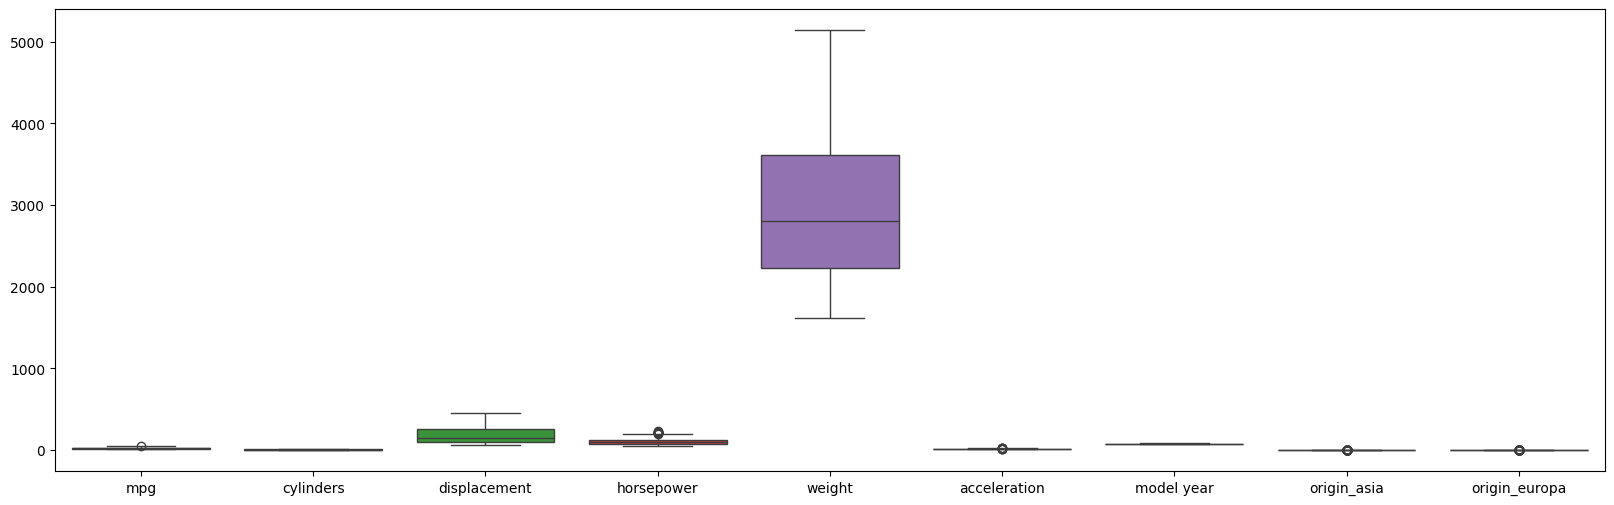

In [141]:
plt.figure(figsize=(20,6))
sns.boxplot(df)

<Axes: ylabel='mpg'>

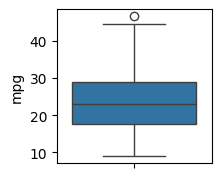

In [142]:
plt.figure(figsize=(2,2))
sns.boxplot(df['mpg'])

In [143]:
Q1, Q3 = np.percentile(df['mpg'], [25, 75])
IRQ = Q3 -Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q3 + (1.5 * IRQ)
df_limpo = df[(df['mpg'] >= limite_inferior)&(df['mpg'] <= limite_superior)]

<Axes: ylabel='mpg'>

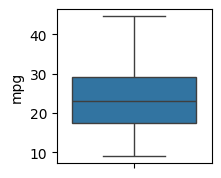

In [144]:
plt.figure(figsize=(2,2))
sns.boxplot(df_limpo['mpg'])

<Axes: ylabel='horsepower'>

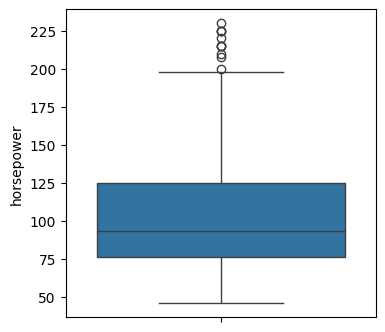

In [145]:
plt.figure(figsize=(4,4))
sns.boxplot(df_limpo['horsepower'])

In [146]:
Q1, Q3 = np.percentile(df_limpo['horsepower'], [ 25, 75])
IRQ = Q3 - Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q3 + (1.5 * IRQ)
df_limpo = df_limpo[(df_limpo['horsepower'] >= limite_inferior)&(df_limpo['horsepower'] <= limite_superior)]

<Axes: ylabel='horsepower'>

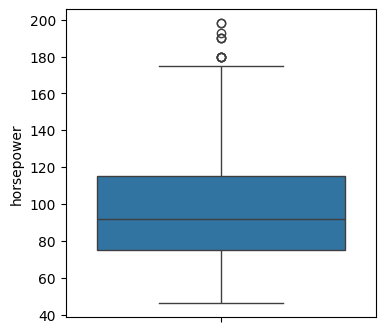

In [147]:
plt.figure(figsize=(4,4))
sns.boxplot(df_limpo['horsepower'])

<Axes: ylabel='acceleration'>

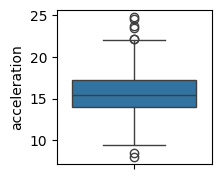

In [148]:
plt.figure(figsize=(2,2))
sns.boxplot(df_limpo['acceleration'])

In [149]:
Q1, Q3 = np.percentile(df_limpo['acceleration'], [25, 75])
IRQ = Q3 - Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q3 + (1.5 * IRQ)
df_limpo = df_limpo[(df_limpo['acceleration'] >= limite_inferior)&(df_limpo['acceleration'] <= limite_superior)]

<Axes: ylabel='acceleration'>

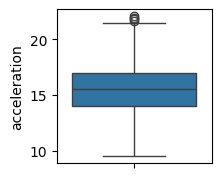

In [150]:
plt.figure(figsize=(2,2))
sns.boxplot(df_limpo['acceleration'])

In [151]:
df_limpo.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0


In [152]:
df_limpo.tail(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europa
395,32.0,4,135.0,84.0,2295,11.6,82,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,0,0
397,31.0,4,119.0,82.0,2720,19.4,82,0,0


In [153]:
df_limpo.nunique()

mpg              125
cylinders          5
displacement      77
horsepower        86
weight           333
acceleration      86
model year        13
origin_asia        2
origin_europa      2
dtype: int64

In [154]:
df_limpo.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin_asia', 'origin_europa'],
      dtype='object')

In [155]:
df['origin_asia'].unique()

array([0, 1], dtype=int64)

In [156]:
df['origin_europa'].unique()

array([0, 1], dtype=int64)

In [157]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

<Axes: >

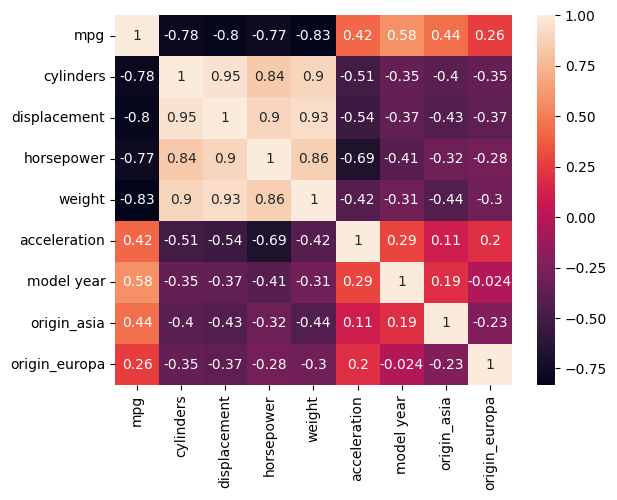

In [158]:
sns.heatmap(df.corr(), annot=True)

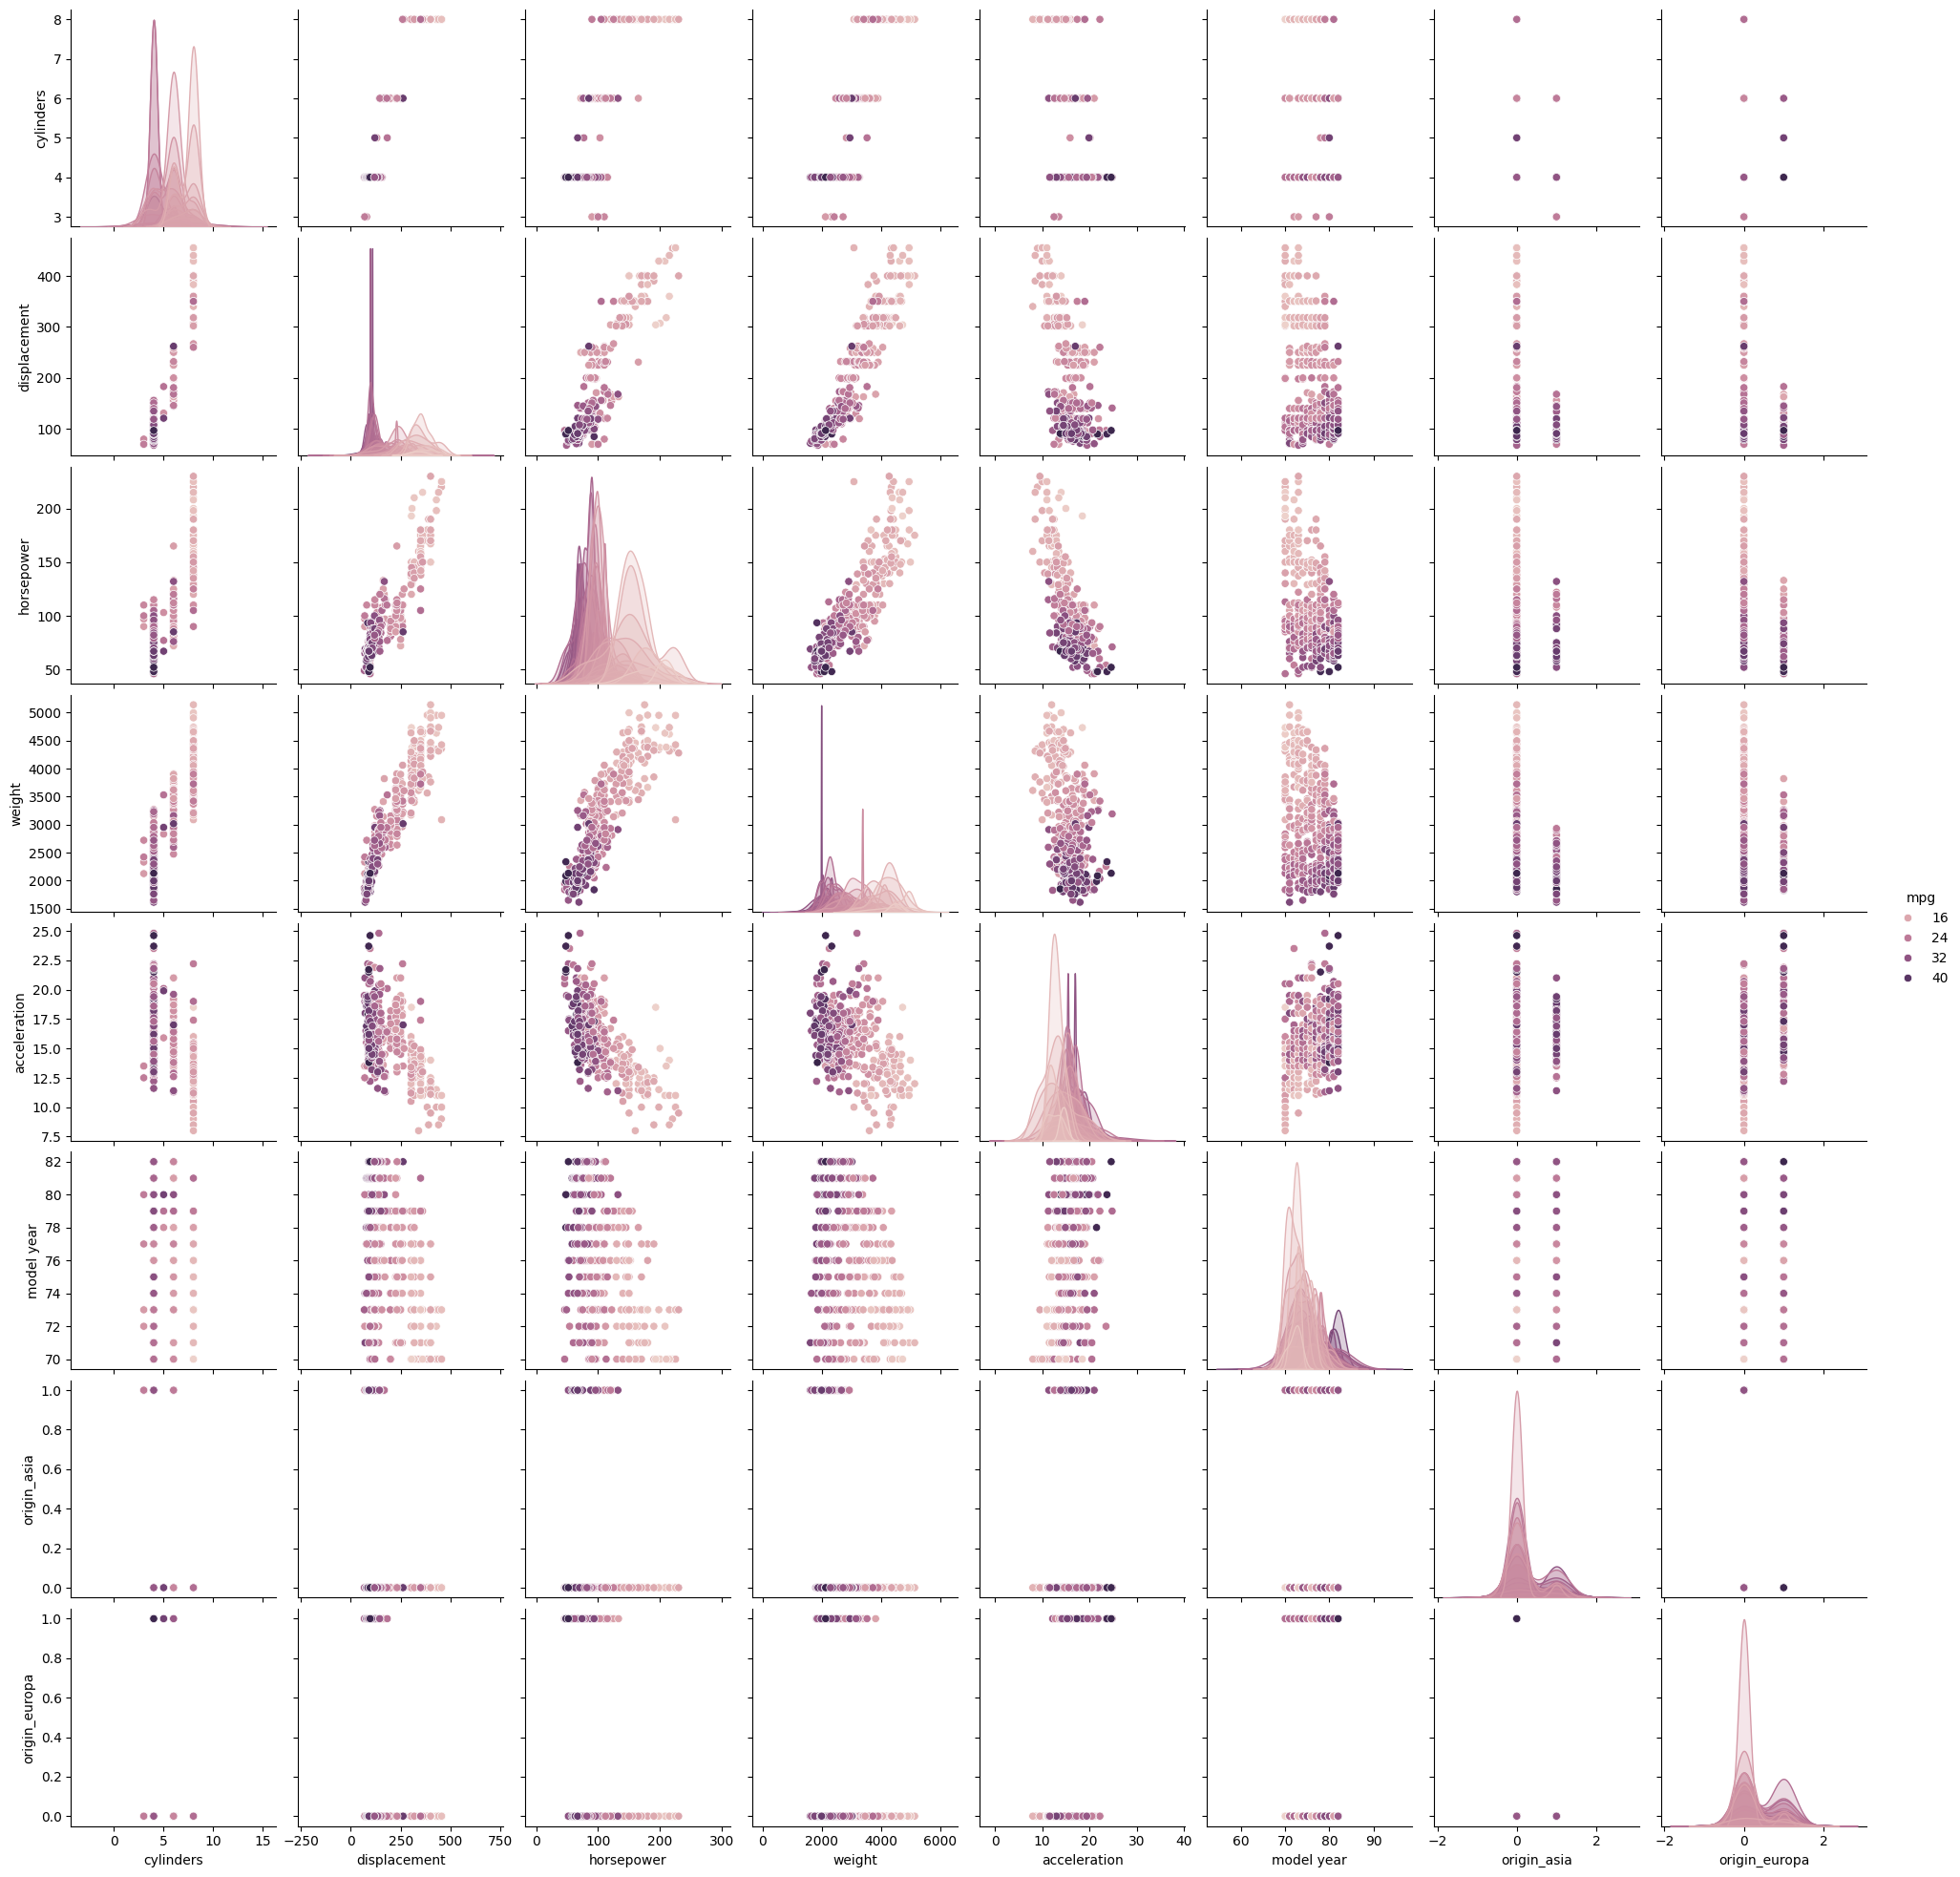

In [159]:
sns.pairplot(df, hue='mpg')

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [161]:
X = df.drop('mpg', axis=1)
y = df['mpg']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [163]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [164]:
y_predict = model.predict(X_test)

In [165]:
# Erro Médio Quadrático (MSE)
MSE = mean_squared_error(y_test, y_predict)

In [166]:
# Raiz do Erro Médio Quadrático (RMSE)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))

In [167]:
# Coeficiente de Determinação (R²)
R2 = r2_score(y_test, y_predict)

In [168]:
print(f'MSE: {MSE:.2f}')
print(f'RME: {RMSE:.2f}')
print(f'R2: {R2:.2f}')

MSE: 9.19
RME: 3.03
R2: 0.84


As colunas 'cylinders', 'displacement', 'horsepower', 'weight' por apresentarem multicolinearidade não serão considerados nesta segunda etapa para a análise da Regressão Linear

In [173]:
X = df.drop(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight'], axis=1)
y = df['mpg']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [177]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [179]:
y_predict = model.predict(X_test)

In [180]:
# Erro Médio Quadrático (MSE)
MSE = mean_squared_error(y_test, y_predict)

In [181]:
# Raiz do Erro Médio Quadrático (RMSE)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))

In [182]:
# Coeficiente de Determinação (R²)
R2 = r2_score(y_test, y_predict)

In [183]:
print(f'MSE: {MSE:.2f}')
print(f'RME: {RMSE:.2f}')
print(f'R2: {R2:.2f}')

MSE: 22.39
RME: 4.73
R2: 0.61


Este modelo com a retirada dos dados que apresentaram multicolinearidade resultaram em um baixo desempenho no modelo